<br>
Merhaba ben Aybüke Berfin Süer. Sakarya Üniversitesi'nin 3.sınıf G2112110029 numaralı öğrencisiyim. Ödev grubumda tek kişiyim.<br> Bugün sizlere önce kaggle'dan bulduğum ve çalıştırdığım örnek hakkında daha sonra kendim drive üzerinden dataset yükleyip çalıştırdığım ve doğru sonuç aldığım sınıflandırma algoritması hakkında bilgi vereceğim.<br>
Açıklamlarıma başlamadan önce örnek ve örnekte kullanılan dataseti aşağıya bırakıyorum.<br>

**Örnek**:https://www.kaggle.com/code/ismetgocer/10-cnn-transfer-learning-model-fine-tuning <br>
**Dataset**:https://www.kaggle.com/datasets/imsparsh/flowers-dataset
<br>
<br>
------------------------------------------------------------------------------

***Öncelikle EfficenNetV2S nedir?***<br>
EfficientNetV2S, Google tarafından geliştirilen bir yapay zeka modeli olan EfficientNet'in geliştirilmiş bir versiyonudur. Bu model, özellikle mobil ve kenar cihazlarında yüksek verimlilik sağlamak üzere tasarlanmıştır. Model, çeşitli ölçeklerdeki veri setleriyle etkili bir şekilde çalışabilmesi için ölçeklenebilirlik özelliğine sahiptir. Transfer öğrenme ve ince ayar (fine-tuning) süreçleri, bu modelin önceden eğitilmiş ağırlıkları kullanılarak yeni görevlere hızla adapte edilmesini sağlar, bu sayede zaman ve kaynak tasarrufu yapılabilir. EfficientNetV2S, özellikle görüntü sınıflandırma gibi görevlerde yüksek performans gösterir.<br><br>

***Bu örnekte ne yaptık, mantığı neydi ?***<br>
Bu örnekte, EfficientNetV2S modeli kullanılarak çiçeklerin sınıflandırılması görevi gerçekleştirilir. Öncelikle çiçek veri seti yüklenir ve önceden eğitilmiş ağırlıklar ile model kurulur. Modelin belirli katmanları dondurularak sadece son katmanlar üzerinde eğitim yapılır. Bu, modelin yeni çiçek türlerini tanıması için ince ayar yapılmasını sağlar. İnce ayar sırasında, öğrenme hızı gibi hiperparametreler optimize edilerek modelin doğruluk oranı artırılır. Bu süreç, modelin çiçek fotoğraflarını daha doğru bir şekilde sınıflandırmasına olanak tanır.<br><br>

**Datasetin Tanıtımı ?**<br>
Bir dataset, belirli bir konuda bilgileri toplayan ve düzenleyen bir veri koleksiyonudur. Araştırma, analiz veya algoritma eğitimi gibi çeşitli amaçlarla kullanılır. Bizim kulandığımız çiçek veri seti, farklı türlerde çiçeklerin görüntülerini içerir ve genellikle makine öğrenmesi modellerini eğitmek için kullanılır. Bu dataset, çeşitli çiçek türlerini temsil eden binlerce yüksek çözünürlüklü görüntü barındırır. Her çiçek türü, modelin tanıma yeteneğini geliştirmek amacıyla kendi kategorisine ayrılmıştır. Bu veri seti, özellikle görüntü işleme ve sınıflandırma algoritmalarının doğruluğunu test etmek ve geliştirmek için kullanılır.

Şimdi ise kodumuzu açıklamaya geçebiliriz.


In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'flowers-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1170109%2F1960165%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240515%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240515T014323Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2a7fe3120d22c111ffad8997eb1ec58404ec2c7e6244d94a2d87b67d533db6d166c6d42f5b5c28892fa2481a2d3fe29130bc59e65d8c33a6f15c83abfbc777e00299cf935f16991cda6e415a2c9f6e28644a0aa5d51db488697772db3c9d65d6c026feec2d68dcf737ea35d7a9815743426b54d79edfdee40b23a6f6728111d0087d371f7de644a0ee37b877a7002cea83da684505bb974955b905880648b20c5579c023e7eeebe6556d96b09aab4d1e311cec47f7b054874eef9986292b8fc47129ca5293481ee38192f78803121ed60033bca3403d5b5493721654cb3c9e599304a10224350c86f368c605d22a8edee8d26d7e764a84dfe83ecb05dec891dd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 215020262 bytes downloaded
Downloaded and uncompressed: flowers-dataset
Data source import complete.


**->** Kaggle not defterlerinde kullanılmak üzere veri kaynaklarını doğru konuma (/kaggle/input) indirip yerleştirmeyi sağlar. Çeşitli veri kaynaklarını tanımlayan URL'lerden verileri indirir, sıkıştırılmış dosyaları açar ve Kaggle dizin yapısına uygun olarak düzenler. Bu işlem, kullanıcıların veri setlerine kolayca erişimini ve Kaggle not defterlerinde bu verileri kullanarak analiz ve modelleme yapmalarını mümkün kılar.

# 1.1. Import the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import seaborn as sns
import cv2
import os
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import applications

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

**->**Başlıkla yazıldığı gibi kütüphanelerin projeye dahil edilmesi

# 1.2. Read and Look at the Data

In [5]:
# # Data setini okuyalim ve ilgili pathlere atayalim;
train_path = "/kaggle/input/flowers-dataset/train"
test_path = "/kaggle/input/flowers-dataset/test"

submission = pd.read_csv("/kaggle/input/flowers-dataset/sample_submission.csv")

class_names = os.listdir(train_path)
class_names

['rose', 'sunflower', 'tulip', 'daisy', 'dandelion']

**->** Burada ise datasetimizdeki train ve test datalarını devamında kullanmak için ayırıyoruz ve tanımlıyoruz

# 1.3. Read the Test Data (According to Image Names), Sort it for Submision and Look at One Example

total test size : 924


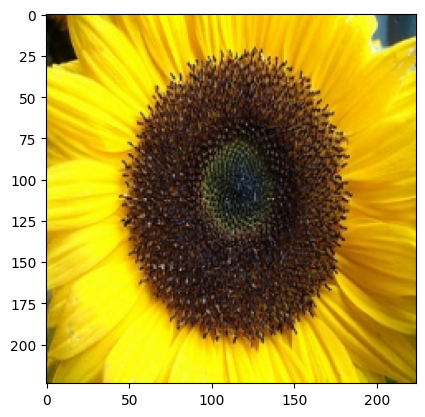

In [6]:
# the pictures are not sorted by name, so we need to fix this first if we want them to be submitted to the contest

image_names = os.listdir(test_path)
image_names.sort(key = lambda x: int(re.search(r'Image_(\d+)', x).group(1)))

test = np.empty((len(image_names), 224, 224, 3), dtype = np.float32)

for i, image_name in enumerate(image_names):

    image_path = os.path.join(test_path, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    test[i] = image

print("total test size :", len(os.listdir(test_path)))
plt.imshow(test[1] / 255);

**Test datasinda 924 resim vardir.**

# 1.4. Look at the Classes and Image Numbers at Train Dataset

In [7]:
total_train = 0
for i in class_names:
    print("Number of", i.capitalize(), "images:", len(os.listdir(train_path + "/" + i)))
    total_train += len(os.listdir(train_path + "/" + i))
print("Total train images : ", total_train)

Number of Rose images: 497
Number of Sunflower images: 495
Number of Tulip images: 607
Number of Daisy images: 501
Number of Dandelion images: 646
Total train images :  2746


**->** Burada train datalarında çeşitlerini ve adedince ekrana yazar.

# 1.5. Split Train Data as X and y

2


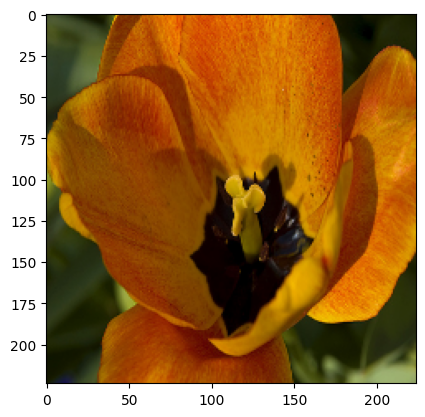

In [8]:
X = np.empty((total_train, 224, 224, 3), dtype = np.float32)
y = np.zeros(total_train, dtype = int)
count = 0

for i, class_name in enumerate(class_names):

    class_path = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_path):

        image_path = os.path.join(class_path, image_name)
        image = imread(image_path)
        image = cv2.resize(image, (224, 224))

        X[count] = image
        y[count] = i
        count = count + 1

print(y[1501])
plt.imshow(X[1501] / 255);

# 1.6. Split Train Data as X_train, y_train, X_test and y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
del X, y

**->**Yazıldığı gibi train dataseti ve test dataseti böler. Bu işlem, modelin genelleştirme performansını doğru bir şekilde değerlendirebilmek için yapılır. test_size=0.2 parametresi, verinin %20'sinin test seti olarak ayrılacağını belirtir. random_state=1 ise her çalıştırdığınızda aynı bölünmeyi sağlar, böylece sonuçlar tekrarlanabilir olur. stratify=y parametresi, hem eğitim hem de test setlerinde hedef değişkenin (y) orijinal veri setindeki dağılımını korumayı sağlar. del X, y kullanımı, gereksiz hale gelen büyük veri yapılarını bellekten silerek hafıza kullanımını optimize eder.
<br><br>

# **Bu kısımda CNN Model'i silmedim örnek olarak göstermek istedim fakat bizim asıl kullandığımız model aşağıda olacak. (EfficenNetV2S)**

Bu yüden kod açıklamalarını orada yapacağım CNN Model'de değil.

# 1.7. Data Augmentatin



In [10]:
# Manuel CNN icin full Img Gen uygula ki daha cok resim olsun model daha iyi ogrensin.

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),keras.layers.RandomRotation(factor=0.2),
                                      layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
                                      layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3)),
                                      layers.RandomBrightness(factor=0.1),
                                      layers.RandomContrast(factor=0.1)])

Burada CNN Modeli için yazılan kodlar fakat bir EffecienNetV2S'i kullanacağız en başta dediğim gibi.Örnek olması adına bunu da görmenizi istedim.


# 2. SET THE MANUEL CNN MODEL (basic_model)

In [11]:
# We didn't scale our data before. We apllied it in here.

inputs = keras.Input(shape = (224, 224, 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1/255)(x) # bu x'i yukaridan alip buraya getiriyoruz. Rscaling islemini burada uyguluyoruz.

x = layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu")(x)
x = layers.Conv2D(filters = 64, kernel_size = (5, 5), padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding = "same", activation = "relu")(x)
x = layers.Conv2D(filters=128, kernel_size=(5, 5), padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

#----ANN----------

x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

outputs = layers.Dense(5, activation = "softmax")(x)

basic_model = keras.Model(inputs, outputs)
basic_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                             

In [12]:
# Object oriented bir yapi var burada.
# Bu kod bloku en iyi skoru veren Epoch'un agirliklarini kullanmamizi sagliyor.

# to select the weights for the epoch with the highest val_score

class GetBestModel(keras.callbacks.Callback):
    def __init__(self, monitor = "val_loss", verbose = 0, mode = "auto"):
        super(GetBestModel, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.mode = mode
        if self.mode == "min":
            self.best = np.Inf
        else:
            self.best = -np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if self.mode == "min" and current < self.best:
            self.best = current
            self.best_weights = self.model.get_weights()
        elif self.mode == "max" and current > self.best:
            self.best = current
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs=None):
        self.model.set_weights(self.best_weights)

**Explanation:** We set up a simple CNN model, we define the best model using the layer where the value of val_loss is min.      

In [13]:
best_model = GetBestModel(monitor = "val_loss", mode = "min", verbose = 1)
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10)

In [14]:
# Ilk calistirma asamasi bu olsun;
# Once LR = 0.1 yap, hizli bir ogrenme yapsin, epoch 5 gibi al calistir. Bunu bir kac kez yap. LR ve epochu degistirebilirsein hafiften.Yukaridaki X li kismi calisrtirmadan devam et.
# Bu satirda ogrendigi agirliklari aklinda tutuyor.

basic_model.compile(optimizer = optimizers.Adam(learning_rate = 0.1), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = basic_model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test), callbacks = [early_stop, best_model])


Epoch 1/5
 6/69 [=>............................] - ETA: 11s - loss: 2.7112 - accuracy: 0.2552

69/69 [==============================] - 57s 411ms/step - loss: 1.6583 - accuracy: 0.3452 - val_loss: 16.4306 - val_accuracy: 0.2273
Epoch 2/5
69/69 [==============================] - 14s 207ms/step - loss: 1.4284 - accuracy: 0.3780 - val_loss: 5.0421 - val_accuracy: 0.2400
Epoch 3/5
69/69 [==============================] - 14s 208ms/step - loss: 1.3748 - accuracy: 0.4103 - val_loss: 14.8223 - val_accuracy: 0.2236
Epoch 4/5
69/69 [==============================] - 14s 210ms/step - loss: 1.3629 - accuracy: 0.4158 - val_loss: 3.9252 - val_accuracy: 0.3018
Epoch 5/5
69/69 [==============================] - 15s 212ms/step - loss: 1.3283 - accuracy: 0.4162 - val_loss: 1.6905 - val_accuracy: 0.5127


In [15]:
# Ikinci olarak burayi calistir;
# Burada LR yi dusur, Epochu az artirabilirsin
# Ikinci calistirmada kaldigi yerden (usttekinin accuracy degerinden) calismaya devam ediyor.

basic_model.compile(optimizer = optimizers.Adam(learning_rate = 0.01), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = basic_model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test), callbacks = [early_stop, best_model])


Epoch 1/5
 6/69 [=>............................] - ETA: 12s - loss: 1.2438 - accuracy: 0.4896

69/69 [==============================] - 20s 223ms/step - loss: 1.1709 - accuracy: 0.5200 - val_loss: 1.2442 - val_accuracy: 0.4891
Epoch 2/5
69/69 [==============================] - 15s 211ms/step - loss: 1.0494 - accuracy: 0.5861 - val_loss: 1.5391 - val_accuracy: 0.3618
Epoch 3/5
69/69 [==============================] - 14s 210ms/step - loss: 1.0003 - accuracy: 0.6097 - val_loss: 3.1065 - val_accuracy: 0.4400
Epoch 4/5
69/69 [==============================] - 14s 209ms/step - loss: 0.9779 - accuracy: 0.6107 - val_loss: 1.6313 - val_accuracy: 0.5382
Epoch 5/5
69/69 [==============================] - 14s 209ms/step - loss: 0.9799 - accuracy: 0.6170 - val_loss: 1.5690 - val_accuracy: 0.3655


In [16]:
#SADECE BURADA DEGISIKLIK YAP SKORU IYILESTIRMEK ICIN
# # Sadece bu bloku LR=0.0001 epoch = 100 yap calistir daha detayli ogrensin.

basic_model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = basic_model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [early_stop, best_model])

# Skoru iyilestirebilecegi kesin degil ama sureden tasarruf saglar.

Epoch 1/50
 6/69 [=>............................] - ETA: 11s - loss: 1.0551 - accuracy: 0.5938

69/69 [==============================] - 19s 216ms/step - loss: 1.0620 - accuracy: 0.5779 - val_loss: 0.9524 - val_accuracy: 0.6255
Epoch 2/50
69/69 [==============================] - 15s 211ms/step - loss: 1.0309 - accuracy: 0.6002 - val_loss: 0.9397 - val_accuracy: 0.6382
Epoch 3/50
69/69 [==============================] - 15s 212ms/step - loss: 1.0086 - accuracy: 0.5965 - val_loss: 0.9017 - val_accuracy: 0.6491
Epoch 4/50
69/69 [==============================] - 14s 210ms/step - loss: 0.9889 - accuracy: 0.6179 - val_loss: 0.9483 - val_accuracy: 0.6036
Epoch 5/50
69/69 [==============================] - 14s 209ms/step - loss: 0.9801 - accuracy: 0.6052 - val_loss: 0.8549 - val_accuracy: 0.6727
Epoch 6/50
69/69 [==============================] - 14s 208ms/step - loss: 0.9800 - accuracy: 0.6129 - val_loss: 0.8691 - val_accuracy: 0.6509
Epoch 7/50
69/69 [==============================] - 14s 209ms/step - loss: 0.9671 - accuracy: 0.6152 - val_loss: 0.8308 - val_accuracy: 0.6655
Epoch 8/50

## 2.1. Fine Tuning

In [17]:
# Fine tuning. Base moelden gelen bilgier hafizasinda. Hafizasindaki agirliklari nasil daha iyi halegetirebileegini ogrenecek bu asamada. O yuzden "ince ayar = Fine Tuning" yapiyoruz.

basic_model.trainable = True

# Fine Tuning olarak 2 sey yaptik ---> 1) trainable =True
                                    #  2) LR yi kucultmek

basic_model.compile(optimizer = optimizers.Adam(1e-5), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) # Adam(1e-5) LR = 0.00001
basic_model.fit(X_train, y_train, epochs = 25, validation_data = (X_test, y_test), callbacks = [early_stop, best_model])

Epoch 1/25
 6/69 [=>............................] - ETA: 12s - loss: 0.8242 - accuracy: 0.6771

69/69 [==============================] - 19s 218ms/step - loss: 0.8587 - accuracy: 0.6617 - val_loss: 0.7199 - val_accuracy: 0.7309
Epoch 2/25
69/69 [==============================] - 15s 213ms/step - loss: 0.8371 - accuracy: 0.6721 - val_loss: 0.7231 - val_accuracy: 0.7345
Epoch 3/25
69/69 [==============================] - 15s 211ms/step - loss: 0.8472 - accuracy: 0.6694 - val_loss: 0.7232 - val_accuracy: 0.7291
Epoch 4/25
69/69 [==============================] - 14s 210ms/step - loss: 0.8363 - accuracy: 0.6726 - val_loss: 0.7244 - val_accuracy: 0.7291
Epoch 5/25
69/69 [==============================] - 14s 209ms/step - loss: 0.8401 - accuracy: 0.6703 - val_loss: 0.7241 - val_accuracy: 0.7327
Epoch 6/25
69/69 [==============================] - 14s 209ms/step - loss: 0.8554 - accuracy: 0.6726 - val_loss: 0.7238 - val_accuracy: 0.7345
Epoch 7/25
69/69 [==============================] - 14s 209ms/step - loss: 0.8323 - accuracy: 0.6762 - val_loss: 0.7238 - val_accuracy: 0.7327
Epoch 8/25

In [18]:
basic_model.evaluate(X_test, y_test)

18/18 [==============================] - 1s 61ms/step - loss: 0.7199 - accuracy: 0.7309


[0.7199333906173706, 0.7309091091156006]

In [19]:
train_proba = basic_model.predict(X_train)
train_prediction = np.argmax(train_proba, axis=1)

val_proba = basic_model.predict(X_test)
val_prediction = np.argmax(val_proba, axis=1)

print("TEST RESULTS")
print(confusion_matrix(y_test, val_prediction))
print(classification_report(y_test, val_prediction))
print("------------------------------")
print("TRAIN RESULTS")
print(confusion_matrix(y_train, train_prediction))
print(classification_report(y_train, train_prediction))

18/18 [==============================] - 1s 61ms/step
TEST RESULTS
[[ 53   4  25   3  15]
 [  0  86   4   2   7]
 [ 25   4  76   7  10]
 [  3   2   2  78  15]
 [  3  10   1   6 109]]
              precision    recall  f1-score   support

           0       0.63      0.53      0.58       100
           1       0.81      0.87      0.84        99
           2       0.70      0.62      0.66       122
           3       0.81      0.78      0.80       100
           4       0.70      0.84      0.76       129

    accuracy                           0.73       550
   macro avg       0.73      0.73      0.73       550
weighted avg       0.73      0.73      0.73       550

------------------------------
TRAIN RESULTS
[[186  14 114  21  62]
 [  2 332  18  14  30]
 [ 84  18 299  20  64]
 [ 17   1   7 315  61]
 [ 11  48   5  24 429]]
              precision    recall  f1-score   support

           0       0.62      0.47      0.53       397
           1       0.80      0.84      0.82       396
    

## 2.2. Save the Model

In [20]:
from tensorflow.keras.models import load_model
basic_model.save('ManuelCNN.h5')

# 3. TRANSFER LEARNING MODELS

## 3.8. EfficientNetV2S
EfficientNetV2S, Google tarafından geliştirilen EfficientNet ailesinin bir parçasıdır ve görüntü sınıflandırma gibi görevlerde yüksek performans ve verimlilik sunar. EfficientNetV2S, model boyutunu küçültürken performansı artırmak için dikkatli bir şekilde optimize edilmiştir. Bu model, katman derinliği, genişliği ve çözünürlüğünü otomatik olarak ayarlayan ölçeklenebilir mimarisi ile öne çıkar. Bu özellikler, EfficientNetV2S'nin hem büyük hem de küçük veri setlerinde etkili bir şekilde çalışmasını sağlar. Ayrıca, daha hızlı eğitim süreleri ve daha iyi genel doğruluk oranları sunar.

In [21]:
# Image generation
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])



> Bu kod bloğu, veri artırma işlemlerini tanımlar ve eğitim veri setine uygulamak için bir Sequential model oluşturur. Veri artırma, modelin genelleme yeteneğini geliştirmek ve aşırı öğrenmeyi önlemek amacıyla eğitim verilerine çeşitli rastgele dönüşümler uygulamayı içerir.



In [22]:
# We will first estimate the base model and then fine-tune it using the weights at the point where the val_los value is min.
# Transfer Learning modelini tanimliyoruz.
base_model = applications.EfficientNetV2S(input_shape = (224, 224, 3), include_top = False,)
base_model.trainable = False # EfficientNetV2S'in butun layerlerini kapattik. Onun agirliklarini degistirmeden kullandedik.

# Eger son 2 katmani egitime acmak istersen--  Model son katmanlara dogru daha iyi ogrendigi icin son katmanalri acmak daha dogru. Keras da bunu oneriyor.
"""for i in base_model.layers[-2:]:
    i.trainable = True"""

# Bizim modele  eklentilerimiz buradan basliyor. EfficeintNet ten gelen sonucu kendi datamiza gore biraz daha egitmek istedik
inputs = keras.Input(shape = (224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training = False)
# ----- Bunlari Efficient modele biz ekedik-----

# Flatten yerine gelen
x = keras.layers.GlobalAveragePooling2D()(x) # x in mantigi ne?

#----ANN----

outputs = keras.layers.Dense(5, activation = "softmax")(x)
model = keras.Model(inputs, outputs) # asil model bu. EfficientNet bu modelin bir parcasi oluyor.
model.summary()

82420632/82420632 [==============================] - 2s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-s (Function  (None, 7, 7, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                            



> Bu kod bloğu, EfficientNetV2S modelini kullanarak çiçek sınıflandırma için transfer öğrenme uygulamasını gösterir. İlk olarak, EfficientNetV2S modeli input_shape=(224, 224, 3) kullanılarak oluşturulur ve tüm katmanları dondurulur (trainable=False).



In [23]:
# Object oriented bir yapi var burada.
# Bu kod bloku en iyi skoru veren Epoch'un agirliklarini kullanmamizi sagliyor.

# to select the weights for the epoch with the highest val_score

class GetBestModel(keras.callbacks.Callback):
    def __init__(self, monitor = "val_loss", verbose = 0, mode = "auto"):
        super(GetBestModel, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.mode = mode
        if self.mode == "min":
            self.best = np.Inf
        else:
            self.best = -np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if self.mode == "min" and current < self.best:
            self.best = current
            self.best_weights = self.model.get_weights()
        elif self.mode == "max" and current > self.best:
            self.best = current
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs=None):
        self.model.set_weights(self.best_weights)



> Bu kod bloğu, en iyi doğrulama skorunu veren epoch'un ağırlıklarını seçmek için bir Callback sınıfı tanımlar. GetBestModel sınıfı, monitor ile izlenen metriğe (örn. val_loss) bağlı olarak en iyi ağırlıkları kaydeder. on_epoch_end metodu her epoch sonunda bu metriği kontrol eder ve en iyi sonucu günceller. Eğitim tamamlandığında on_train_end metodu, modelin ağırlıklarını en iyi epoch'un ağırlıkları ile günceller. Bu, modelin en iyi performans gösterdiği epoch'un ağırlıklarını kullanmasını sağlar.




In [24]:
best_model = GetBestModel(monitor = "val_loss", mode = "min", verbose = 1)
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10)



> Bu kod bloğu, model eğitimi sırasında en iyi modeli seçmek ve erken durdurma uygulamak için iki callback kullanır. best_model, GetBestModel sınıfının bir örneğidir ve val_loss metriğini izler.





> Alttaki kod bloğu, modelin derlenmesini ve eğitimini gerçekleştirir.



In [25]:
# EfficientNet'ten (Transfer Learning: TL'den) gelen ve Kendi Katmanimizla (KK) olusan modeli calistiriyoeuz burada. Burayi calistir.
model.compile(optimizer = optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [early_stop, best_model])

Epoch 1/50
69/69 [==============================] - 23s 140ms/step - loss: 0.8300 - accuracy: 0.7145 - val_loss: 0.4931 - val_accuracy: 0.8345
Epoch 2/50
69/69 [==============================] - 5s 75ms/step - loss: 0.4585 - accuracy: 0.8529 - val_loss: 0.3756 - val_accuracy: 0.8709
Epoch 3/50
69/69 [==============================] - 5s 74ms/step - loss: 0.3603 - accuracy: 0.8898 - val_loss: 0.3406 - val_accuracy: 0.8691
Epoch 4/50
69/69 [==============================] - 5s 74ms/step - loss: 0.3223 - accuracy: 0.9003 - val_loss: 0.3012 - val_accuracy: 0.8909
Epoch 5/50
69/69 [==============================] - 5s 75ms/step - loss: 0.2876 - accuracy: 0.9076 - val_loss: 0.2908 - val_accuracy: 0.8909
Epoch 6/50
69/69 [==============================] - 5s 74ms/step - loss: 0.2662 - accuracy: 0.9139 - val_loss: 0.2900 - val_accuracy: 0.8891
Epoch 7/50
69/69 [==============================] - 5s 74ms/step - loss: 0.2496 - accuracy: 0.9185 - val_loss: 0.2770 - val_accuracy: 0.8964
Epoch 8/50


### 3.8.1. Fine tuning


> İnce ayar (fine-tuning), önceden eğitilmiş bir makine öğrenimi modelinin ağırlıklarının, yeni bir veri seti üzerinde optimize edilmesi sürecidir. Bu süreçte, temel modelin ağırlıkları başlangıç noktası olarak kullanılır ve model, yeni veriler üzerinde daha düşük bir öğrenme oranı ile yeniden eğitilir.



In [26]:
# Fine tuning. Base moelden gelen bilgier hafizasinda. Hafizasindaki agirliklari nasil daha iyi halegetirebileegini ogrenecek bu asamada. O yuzden "ince ayar = Fine Tuning" yapiyouz.
base_model.trainable = True

# Fine Tuning olarak 2 sey yaptik ---> 1) trainable =True
                                    #  2) LR yi kucultmek

model.compile(optimizer = optimizers.Adam(1e-5), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) # Adam(1e-5) LR = 0.00001
model.fit(X_train, y_train, epochs = 25, validation_data = (X_test, y_test), callbacks = [early_stop, best_model])

Epoch 1/25
69/69 [==============================] - 104s 350ms/step - loss: 0.1153 - accuracy: 0.9658 - val_loss: 0.2398 - val_accuracy: 0.9164
Epoch 2/25
69/69 [==============================] - 17s 243ms/step - loss: 0.0649 - accuracy: 0.9850 - val_loss: 0.2311 - val_accuracy: 0.9164
Epoch 3/25
69/69 [==============================] - 17s 243ms/step - loss: 0.0451 - accuracy: 0.9891 - val_loss: 0.2227 - val_accuracy: 0.9255
Epoch 4/25
69/69 [==============================] - 17s 244ms/step - loss: 0.0368 - accuracy: 0.9918 - val_loss: 0.2151 - val_accuracy: 0.9236
Epoch 5/25
69/69 [==============================] - 17s 244ms/step - loss: 0.0247 - accuracy: 0.9945 - val_loss: 0.2131 - val_accuracy: 0.9218
Epoch 6/25
69/69 [==============================] - 17s 241ms/step - loss: 0.0175 - accuracy: 0.9977 - val_loss: 0.2315 - val_accuracy: 0.9236
Epoch 7/25
69/69 [==============================] - 17s 242ms/step - loss: 0.0133 - accuracy: 0.9973 - val_loss: 0.2299 - val_accuracy: 0.923

### 3.8.2. Evaluate the Model


> Eğitim ve doğrulama setleri için karışıklık matrisi ve sınıflandırma raporu yazdırılır. Bu raporlar, modelin sınıf bazında doğruluk, kesinlik (precision), geri çağırma (recall) ve F1 skoru gibi metriklerini gösterir. Karışıklık matrisi, gerçek sınıflar ile tahmin edilen sınıflar arasındaki ilişkiyi görselleştirir. Bu, modelin hangi sınıflarda iyi performans gösterdiğini ve hangi sınıflarda iyileştirmeye ihtiyaç duyduğunu belirlemenizi sağlar.



In [27]:
train_proba = model.predict(X_train)
train_prediction = np.argmax(train_proba, axis=1)

val_proba = model.predict(X_test)
val_prediction = np.argmax(val_proba, axis=1)

print("TEST RESULTS")
print(confusion_matrix(y_test, val_prediction))
print(classification_report(y_test, val_prediction))
print("------------------------------")
print("TRAIN RESULTS")
print(confusion_matrix(y_train, train_prediction))
print(classification_report(y_train, train_prediction))

18/18 [==============================] - 1s 52ms/step
TEST RESULTS
[[ 87   5   5   2   1]
 [  2  94   1   0   2]
 [ 11   1 108   1   1]
 [  1   0   1  95   3]
 [  0   3   0   3 123]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       100
           1       0.91      0.95      0.93        99
           2       0.94      0.89      0.91       122
           3       0.94      0.95      0.95       100
           4       0.95      0.95      0.95       129

    accuracy                           0.92       550
   macro avg       0.92      0.92      0.92       550
weighted avg       0.92      0.92      0.92       550

------------------------------
TRAIN RESULTS
[[396   0   1   0   0]
 [  0 396   0   0   0]
 [  3   1 480   0   1]
 [  0   0   0 401   0]
 [  0   1   0   2 514]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       397
           1       0.99      1.00      1.00       396
    

### 3.8.3. Save the Model

In [28]:
from tensorflow.keras.models import load_model
model.save('EfficientNetV2S.h5')

# Compare the Model Performances


>Bu kod bloğu, farklı testlerin sonuçlarını bir liste içinde tutar. Her bir testin adı, eğitim doğruluk skoru (Accuracy Score) ve doğrulama doğruluk skoru (Val_Accuracy) ile temsil edilir. Örneğin, 'Manuel CNN' testinde modelin eğitim doğruluğu %63, doğrulama doğruluğu %63'tür. 'EfficientNetV2S' testinde ise eğitim doğruluğu %99, doğrulama doğruluğu %94 olarak kaydedilmiştir. Bu yapı, çeşitli modellerin veya ayarların performansını karşılaştırmak için kullanılır.



In [29]:
test_results = [
    {'Test': 'Manuel CNN', 'Accuracy Score': 0.63, 'Val_Accuracy': 0.63},
    {'Test': 'EfficientNetV2S', 'Accuracy Score': 0.99, 'Val_Accuracy': 0.94},
    ]

In [30]:
# Transform to DataFrame
results_df = pd.DataFrame(test_results)

# Sort by f1-score and Misclassification together;
sorted_results = results_df.sort_values(by=['Accuracy Score', 'Val_Accuracy'], ascending=[False, False])

# Let's show the results by resetting the indexes
sorted_results_reset = sorted_results.reset_index(drop=True)

# Show the results;
print(sorted_results_reset)

              Test  Accuracy Score  Val_Accuracy
0  EfficientNetV2S            0.99          0.94
1       Manuel CNN            0.63          0.63


**YORUM:** En basarili model EfficientNetV2S modeli olmustur. Genel olarak transfer learning modellerinin manuel CNN'den  daha iyi performans gosterdikleri belirlenmistir.

# 4. PREDICTION

En iyi skoru ConvNextTiny modelinde aldigimiz icin bu modeli kullanarak final predictionlari elde edecegiz.

In [31]:
prediction = model.predict(test)

class_labels = ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

predicted_classes = [class_labels[np.argmax(prediction[i])] for i in range(len(prediction))]

29/29 [==============================] - 2s 86ms/step


Predicted class: dandelion


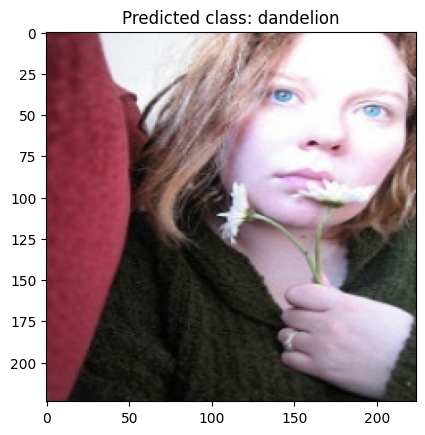

In [55]:
index = 181
print(f"Predicted class: {predicted_classes[index]}")
plt.imshow(test[index] / 255)
plt.title(f"Predicted class: {predicted_classes[index]}")
plt.show()

# 5. DEPLOYMENT ON THE STREAMLIT

Bu calismanin kisa versiyonunun Streamlit ile deploy edilmis hali: https://flowers-data-cnn-and-transfer-learning-models-project.streamlit.app/


# 6. SUBMISSION

In [56]:
submission["prediction"] = predicted_classes
submission.to_csv("trained_model.csv",index = False)

In [57]:
# Elde ettigimiz predict'leri submission dosyasina yukleyelim;
submission["prediction"] = predicted_classes

In [58]:
# Elde ettigimiz final submisson dosyasini "ConvNeXtTiny.csv" ismiyle disa aktaralim;
submission.to_csv("ConvNeXtTiny.csv",index = False)